## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [23]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [24]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [25]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [30]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  30


In [31]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  30
positive number:  9
negative number:  4
neutral number:  17


In [33]:
tweet_list[0:30]

,0
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
1,RT @GabyMeza8: RUMOR: Según el insider #MyTime...
2,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
3,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
4,@peterjordan100 Disney e seus integrantes maio...
5,RT @peterjordan100: Saiu video do Raluca e a g...
6,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
7,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


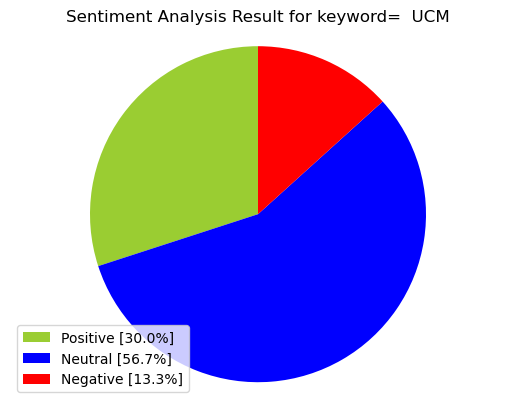

In [34]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [35]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [36]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
1,RT @GabyMeza8: RUMOR: Según el insider #MyTime...,RT @GabyMeza8: RUMOR: Según el insider #MyTime...
2,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
4,@peterjordan100 Disney e seus integrantes maio...,@peterjordan100 Disney e seus integrantes maio...
5,RT @peterjordan100: Saiu video do Raluca e a g...,RT @peterjordan100: Saiu video do Raluca e a g...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
10,@nerdemcartaz @SnyderCareca Se o papel dele fo...,@nerdemcartaz @SnyderCareca Se o papel dele fo...
11,🎥🎬 Ya disponible en el canal la #crítica de #G...,🎥🎬 Ya disponible en el canal la #crítica de #G...
12,RT @soypietro1: Cada día qué pasa me convenzo ...,RT @soypietro1: Cada día qué pasa me convenzo ...
13,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...


In [37]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
1,RT @GabyMeza8: RUMOR: Según el insider #MyTime...,rumor seg n el insider mytimetoshinehello ...
2,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...
4,@peterjordan100 Disney e seus integrantes maio...,disney e seus integrantes maior inimigo da m...
5,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
10,@nerdemcartaz @SnyderCareca Se o papel dele fo...,se o papel dele foi morrer prs formiga e ...
11,🎥🎬 Ya disponible en el canal la #crítica de #G...,ya disponible en el canal la cr tica de g...
12,RT @soypietro1: Cada día qué pasa me convenzo ...,cada d a qu pasa me convenzo m s que los re...
13,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...


In [38]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_13749/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
1,RT @GabyMeza8: RUMOR: Según el insider #MyTime...,rumor seg n el insider mytimetoshinehello ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@peterjordan100 Disney e seus integrantes maio...,disney e seus integrantes maior inimigo da m...,0.0,0.000000,positive,0.000,0.714,0.286,0.4215
5,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
10,@nerdemcartaz @SnyderCareca Se o papel dele fo...,se o papel dele foi morrer prs formiga e ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
11,🎥🎬 Ya disponible en el canal la #crítica de #G...,ya disponible en el canal la cr tica de g...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @soypietro1: Cada día qué pasa me convenzo ...,cada d a qu pasa me convenzo m s que los re...,0.2,0.300000,positive,0.000,0.877,0.123,0.4215
13,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [39]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [41]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [42]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,9,64.29
positive,4,28.57
negative,1,7.14


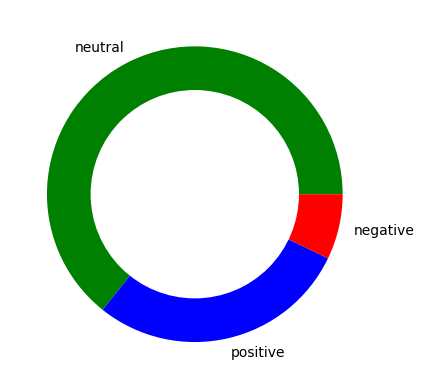

In [43]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [44]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



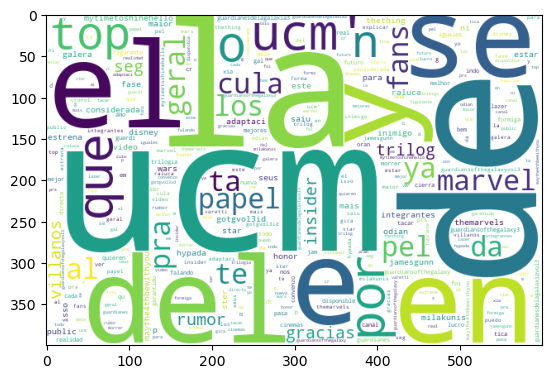

In [45]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

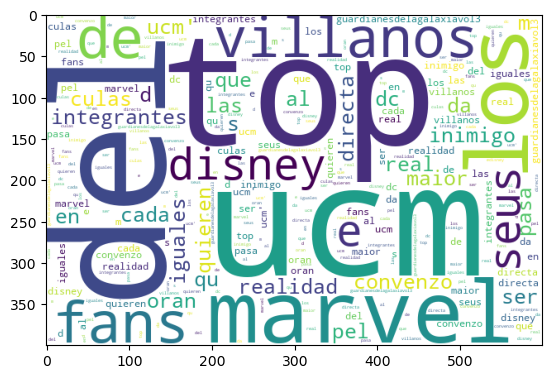

In [46]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

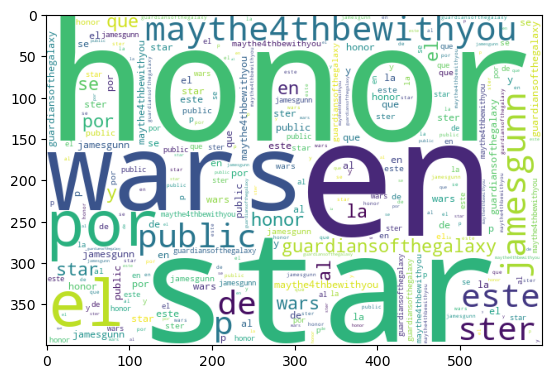

In [47]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

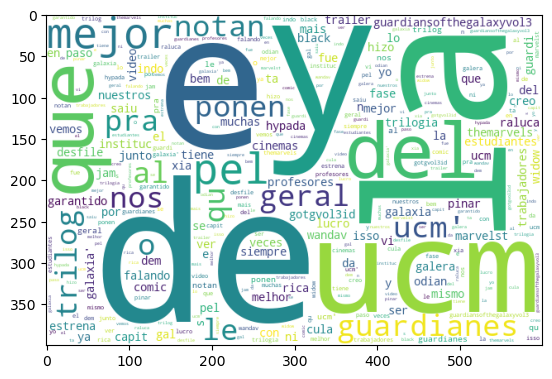

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)